In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("data_to_MF/smiles_list_1.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,Cn1cccc1N1c2ccccc2C(C)(Cc2ccc(C(=O)C(F)(F)F)cc...,Random
1,c1cc(Pc2cccc(C3c4ccccc4-c4ccccc43)c2)cc(-c2ccc...,Random
2,O=c1cc(-c2c(F)c(F)cc(F)c2F)[nH]c2ccc(-c3c(-c4c...,Random
3,O=S1(=O)c2ccccc2-c2ccc(-c3cc4ccccc4c4ccccc34)cc21,Random
4,C=C[SH]1C=CC=C1c1cc(-c2ccc3[nH]c(N4c5ccccc5C(C...,Random
...,...,...
50567,CC(C)COC(=O)Oc1c(Cl)cc2oc(=O)sc2c1[N+](=O)[O-],zinc
50568,Cc1c(C(=O)NN=C2CCCC2)nnn1-c1nonc1N,zinc
50569,CN(C)c1nc2nonc2nc1Nc1cccc(Cl)c1,zinc
50570,COc1cccc(NC(=O)CSC(N)=O)c1,zinc


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
#df.to_csv('result/MF/df_MF.csv', index = False)
df

(50572, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50567,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,3.615724,8.609159
1,8.782680,6.227559
2,4.761587,9.881824
3,5.988508,6.173542
4,7.526026,6.015500
...,...,...
50567,9.013590,0.404983
50568,10.580649,-1.257717
50569,7.929736,2.467389
50570,10.117336,-2.015279


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,3.615724,8.609159,Random
1,8.782680,6.227559,Random
2,4.761587,9.881824,Random
3,5.988508,6.173542,Random
4,7.526026,6.015500,Random


In [6]:
MF_umap_random = df_umap[df_umap['made_by'] == 'Random']
MF_umap_zinc = df_umap[df_umap['made_by'] == 'zinc']

#MF_umap_random.to_csv('result/MF/MF_umap_Random.csv', index = False)
#MF_umap_zinc.to_csv('result/MF/MF_umap_zinc.csv', index = False)

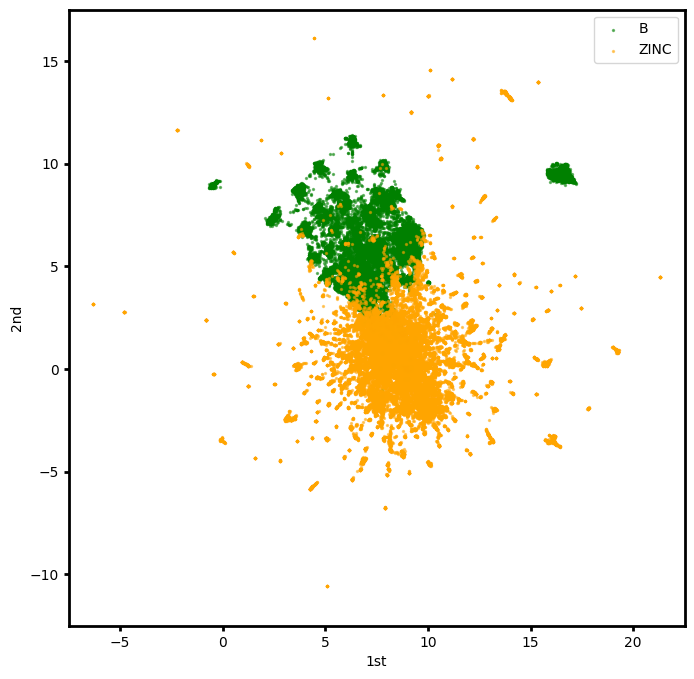

In [7]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_random['UMAP_0'], MF_umap_random['UMAP_1'], color='green', label='B', s=2, alpha=0.5)
plt.scatter(MF_umap_zinc['UMAP_0'], MF_umap_zinc['UMAP_1'], color='orange', label='ZINC', s=2, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7.5, 22.5)
plt.ylim(-12.5, 17.5)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()